## Observations and Insights 

OBSERVATIONS:

1. For this population of Mice, Ramicane was the most successful treatment, with Capomulin coming in at a close second. The average tumor volume for each of these regimen's was approximately 3% lower than that of the other drugs.

2. The IQR for these two drugs are greater than the IQR of the 3rd and 4th place regimens (Ceftamin and Infubinol).

3. There is a distinct positive correlation between mouse weight and tumor size, showing the higher the weight, the larger the tumor size. The correlation between weight and avgerage tumor size is 0.84



In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
study_df.sort_values("Mouse ID", inplace = True)
study_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [2]:
# Checking the number of mice in the DataFrame.
num_mice = len(study_df["Mouse ID"].unique())
num_mice
print(f"There are {num_mice} mice in this data set")

There are 249 mice in this data set


In [26]:
# Optional: Get all the data for the duplicate mouse ID. Finding Duplicate Mouse data
duplicate_mouse = study_df.loc[study_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
# Results printed = duplicate_mouse = array(['g989'], dtype=object)

# Creating new df removing all lines with the duplicate mouse's id
mouse_df = study_df[study_df["Mouse ID"].isin(duplicate_mouse)== False]
mouse_df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [4]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = len(mouse_df["Mouse ID"].unique())

print(f"There are {num_mice2 } mice in this data set")

There are 248 mice in this data set


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Created Summary Stat table using groupby on the Main Mouse DF.

mouse_mean = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_median = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() 
mouse_std = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_var = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_sem = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
mouse_count = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
summary_stat_df = pd.DataFrame({
    
    "Count Tumor Volume (mm3)" : mouse_count,
    "Mean Tumor Volume (mm3)" : mouse_mean,
    "Median Tumor Volume (mm3)" : mouse_median,
    "Standard Deviation Tumor Volume (mm3)" : mouse_std,
    "Variance Tumor Volume (mm3)" : mouse_var,
    "SEM Tumor Volume (mm3)" : mouse_sem,
    
})

summary_stat_df

,Count Tumor Volume (mm3),Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Variance Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,148,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar Plots

<Figure size 360x360 with 0 Axes>

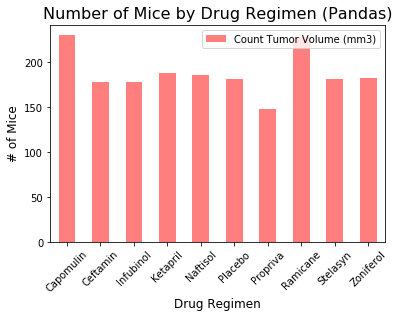

In [6]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Creating new df to plot counts by drug regimen by time point
drug_regimen_df = summary_stat_df["Count Tumor Volume (mm3)"]
# reset index to removed groupby on Drug Regimen
drug_regimen_df = drug_regimen_df.reset_index()
drug_regimen_df

# Bar Graph using Pandas method
x_axis = np.arange(len(drug_regimen_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(5,5))
drug_regimen_df.plot(kind ="bar", color='r', alpha=0.5, align="center")
plt.xticks(x_axis, drug_regimen_df["Drug Regimen"], rotation=45)

# Formatting Graph
plt.title("Number of Mice by Drug Regimen (Pandas)", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("# of Mice", fontsize=12)
plt.show()


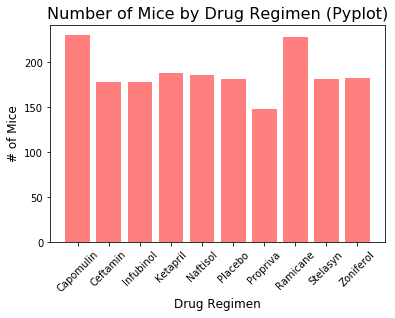

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Create an array that contains the number of users each language has

mice = drug_regimen_df["Count Tumor Volume (mm3)"]
x_axis = np.arange(len(drug_regimen_df["Drug Regimen"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen_df["Drug Regimen"], rotation=45)

#FORMATTING BAR PLOT

plt.title("Number of Mice by Drug Regimen (Pyplot)", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("# of Mice", fontsize=12)

plt.bar(x_axis, mice, color='r', alpha=0.5, align="center")
plt.show()


## Pie Plots

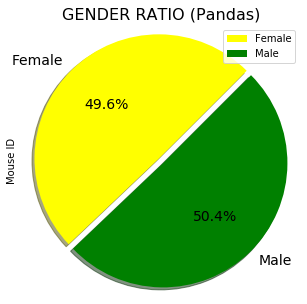

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# CREATING DF IN ORDER TO BUILD PIE PLOT FOR GENDERS
gender_cts = mouse_df.groupby("Sex")["Mouse ID"].nunique() 
gender_cts = gender_cts.reset_index()
gender_df = pd.DataFrame(gender_cts)

explode = (0.05, 0)
labels =  gender_df["Sex"]

gender_df.plot(kind ='pie', y="Mouse ID", shadow = True, colors=["yellow","green"], explode=explode, labels=labels, figsize=(5,5), autopct='%1.1f%%', startangle=45, fontsize=14)
plt.title("GENDER RATIO (Pandas)", fontsize=16)
plt.axis("equal")
plt.show()

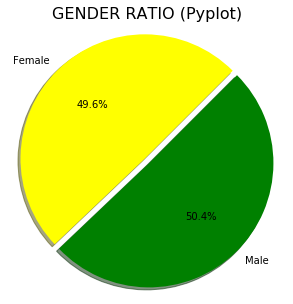

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_cts = mouse_df.groupby("Sex")["Mouse ID"].nunique() 
gender_cts = gender_cts.reset_index()
gender_df = pd.DataFrame(gender_cts)
gender_df

explode = (0.05, 0)
genders = gender_df["Sex"]
m_counts = gender_df["Mouse ID"]
colors = ["yellow","green"]

plt.figure(figsize=(5,5))
plt.pie(m_counts, explode=explode,labels=genders, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("GENDER RATIO (Pyplot)", fontsize=16)

plt.show()

## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin.

# In order to find the most successful treatments, I evaluated all mice that made it to Timepoint 45 (assuming these were the most successful). 
# Then I took the avg tumor volume and returned the smallest 4 and their respective drugs (did not realized that the 4 drugs were provided already, oops.)

# Make new df taking only mice that made it to the Timeslot = 45
miceat45_df = mouse_df.loc[(mouse_df["Timepoint"] > 44)]

#group by Drug and then the mean of the Tumor Volume to see who has the smallest avg. tumor size
miceat45_grouped=round(miceat45_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),2)

#make new df out of grouped results and sort by avg tumor volume to return the top 4 performers
miceat45_grouped_df = pd.DataFrame(miceat45_grouped)
miceat45_grouped_df = miceat45_grouped_df.sort_values(by="Tumor Volume (mm3)", ascending=True)

#Showing top 4 Drug Regimen and the avg. tumor size of their most successful experiments
miceat45_grouped_df.head(4)


,Tumor Volume (mm3)
Drug Regimen,
Ramicane,34.96
Capomulin,36.24
Ceftamin,64.13
Infubinol,65.76


In [11]:
# EVALUATING ALL MICE THAT HAVE TIMESLOT OF 45 AND DRUG REGIMEN = TOP 4 PERFORMERS

#Making new df for all evaluations where Timeslot = 45 and drug = Ramicane, Capomulin, Ceftamin, Infubinol
iqr_df22 = mouse_df.loc[(mouse_df["Timepoint"] > 44)]
iqr_df2 =iqr_df22.loc[(iqr_df22["Drug Regimen"] == "Ramicane") 
                       | (iqr_df22["Drug Regimen"] == "Capomulin")
                          | (iqr_df22["Drug Regimen"] == "Ceftamin")
                             | (iqr_df22["Drug Regimen"] == "Infubinol")]
iqr_df2 



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [12]:
# BUILDING NEW DF WHERE COLUMNS = DRUG REGIMEN AND TUMOR SIZES ARE VALUES TO PUT IN BOX PLOT (SEE SCREEN SHOT)
boxplot_df1 =pd.DataFrame(iqr_df2)

# Making new dfs for each drug regimen = Ramicane, Capomulin, Ceftamin, Infubinol

# Filter the data so that only the results from the specific drug are showing
Ramicane = boxplot_df1.loc[boxplot_df1["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
Capomulin = boxplot_df1.loc[boxplot_df1["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Ceftamin = boxplot_df1.loc[boxplot_df1["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
Infubinol = boxplot_df1.loc[boxplot_df1["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]


In [13]:
# Ramicane outliers
r_quartiles = Ramicane.quantile([0.25,0.75])
r_lowerq =r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq - r_lowerq

print(f'UPPER QUANTILE = {r_upperq}')
print(f'LOWER QUANTILE = {r_lowerq}')
print(f'IQR = {r_iqr}')
print(f'RAMICANE - POTENTIAL OUTLIERS COULD BE < {r_lowerq} AND > {r_upperq}.')

UPPER QUANTILE = 38.508305307499995
LOWER QUANTILE = 30.981175224999998
IQR = 7.527130082499998
RAMICANE - POTENTIAL OUTLIERS COULD BE < 30.981175224999998 AND > 38.508305307499995.


In [14]:
# Capomulin outliers
c_quartiles = Capomulin.quantile([0.25,0.75])
c_lowerq =c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq - c_lowerq

print(f'UPPER QUANTILE = {c_upperq}')
print(f'LOWER QUANTILE = {c_lowerq}')
print(f'IQR = {c_iqr}')
print(f'CAPOMULIN - POTENTIAL OUTLIERS COULD BE < {c_lowerq} AND > {c_upperq}.')

UPPER QUANTILE = 40.1592203
LOWER QUANTILE = 32.37735684
IQR = 7.781863460000004
CAPOMULIN - POTENTIAL OUTLIERS COULD BE < 32.37735684 AND > 40.1592203.


In [15]:
# Ceftamin outliers
cf_quartiles = Ceftamin.quantile([0.25,0.75])
cf_lowerq =cf_quartiles[0.25]
cf_upperq = cf_quartiles[0.75]
cf_iqr = cf_upperq - cf_lowerq

print(f'UPPER QUANTILE = {cf_upperq}')
print(f'LOWER QUANTILE = {cf_lowerq}')
print(f'IQR = {cf_iqr}')
print(f'CEFTAMIN - POTENTIAL OUTLIERS COULD BE < {cf_lowerq} AND > {cf_upperq}.')

UPPER QUANTILE = 67.52748237
LOWER QUANTILE = 61.43389223
IQR = 6.093590140000003
CEFTAMIN - POTENTIAL OUTLIERS COULD BE < 61.43389223 AND > 67.52748237.


In [16]:
# Infubinol outliers
if_quartiles = Ceftamin.quantile([0.25,0.75])
if_lowerq =if_quartiles[0.25]
if_upperq = if_quartiles[0.75]
if_iqr = if_upperq - if_lowerq

print(f'UPPER QUANTILE = {if_upperq}')
print(f'LOWER QUANTILE = {if_lowerq}')
print(f'IQR = {if_iqr}')
print(f'INFUBINOL - POTENTIAL OUTLIERS COULD BE < {if_lowerq} AND > {if_upperq}.')

UPPER QUANTILE = 67.52748237
LOWER QUANTILE = 61.43389223
IQR = 6.093590140000003
INFUBINOL - POTENTIAL OUTLIERS COULD BE < 61.43389223 AND > 67.52748237.


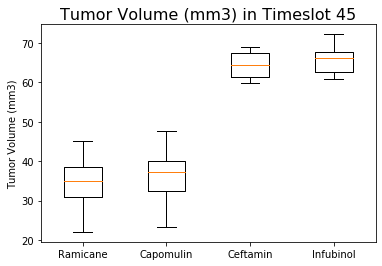

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Pulling in individual dfs to one box plot
plt.boxplot([Ramicane,Capomulin, Ceftamin, Infubinol], labels=["Ramicane", "Capomulin", "Ceftamin","Infubinol"])
plt.title('Tumor Volume (mm3) in Timeslot 45', fontsize=16)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [18]:
# Creating new df for selected mouse to plot

capo_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", :]
sample_mouse = capo_df.loc[capo_df["Mouse ID"] == "f966"]
sample_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
64,f966,Capomulin,Male,16,17,20,30.485985,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
60,f966,Capomulin,Male,16,17,0,45.000000,0


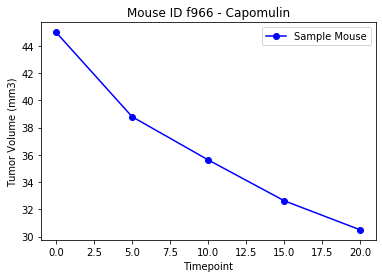

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = sample_mouse["Timepoint"]
y_axis = sample_mouse["Tumor Volume (mm3)"]

plt.title("Mouse ID f966 - Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

# Assign plots to tuples that stores result of plot
plt.plot(x_axis, y_axis, marker ='o', color='blue', label="Sample Mouse")

# Adds a legend and sets its location to the lower right
plt.legend(loc="upper right")
plt.show()

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Create new DF for Capomulin, including weight and tumor vol

scatter_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", :]
scatter_df.drop(["Sex","Drug Regimen","Metastatic Sites","Age_months"], axis=1, inplace=True)
scatter_df.head(3)

C:\Users\kaspromonti\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Mouse ID,Weight (g),Timepoint,Tumor Volume (mm3)
308,b128,22,40,38.379726
309,b128,22,45,38.982878
306,b128,22,30,40.605335


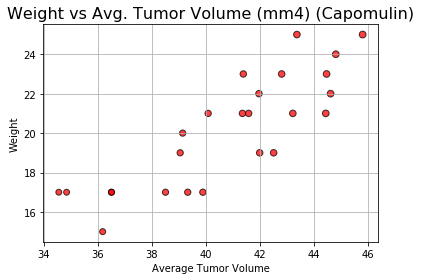

In [21]:
#setting the x and y axis
y_axis_weights = scatter_df.groupby("Mouse ID")["Weight (g)"].mean()
x_axis = scatter_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis, y_axis_weights, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

# FORMATTING SCATTER PLOT
plt.title("Weight vs Avg. Tumor Volume (mm4) (Capomulin)", fontsize=16)
plt.ylabel("Weight")
plt.xlabel("Average Tumor Volume")
plt.grid()

## Correlation and Regression

The correlation between weight and avgerage tumor size is 0.84


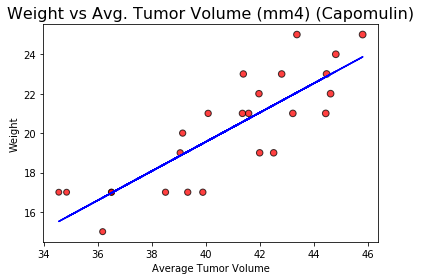

In [23]:
# Demonstrating linear regression model for mouse weight and average tumor volume for the Capomulin regimen

y_axis_weights = scatter_df.groupby("Mouse ID")["Weight (g)"].mean()
x_axis = scatter_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
# plt.scatter(x_axis, y_axis_weights, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis_weights)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis_weights, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"b-")

plt.title("Weight vs Avg. Tumor Volume (mm4) (Capomulin)", fontsize=16)
plt.ylabel("Weight")
plt.xlabel("Average Tumor Volume")

# Calculating the Pearson correlation coefficient between "Average Tumor Volume" and "Average Alcohol Consumed"
correlation = st.pearsonr(y_axis_weights,x_axis)
print(f"The correlation between weight and avgerage tumor size is {round(correlation[0],2)}")
plt.show()